# Visualizing Quantities

In [32]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Read the data and display the first few rows
birds = pd.read_csv("../data/birds.csv")
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In [34]:
# Check the dimension of the dataset
birds.shape

(443, 13)

In [35]:
# Show more information about the dataset
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                443 non-null    object 
 1   ScientificName      443 non-null    object 
 2   Category            443 non-null    object 
 3   Order               443 non-null    object 
 4   Family              443 non-null    object 
 5   Genus               443 non-null    object 
 6   ConservationStatus  443 non-null    object 
 7   MinLength           443 non-null    float64
 8   MaxLength           443 non-null    float64
 9   MinBodyMass         443 non-null    float64
 10  MaxBodyMass         443 non-null    float64
 11  MinWingspan         443 non-null    float64
 12  MaxWingspan         443 non-null    float64
dtypes: float64(6), object(7)
memory usage: 45.1+ KB


In [36]:
birds.Name.nunique()

443

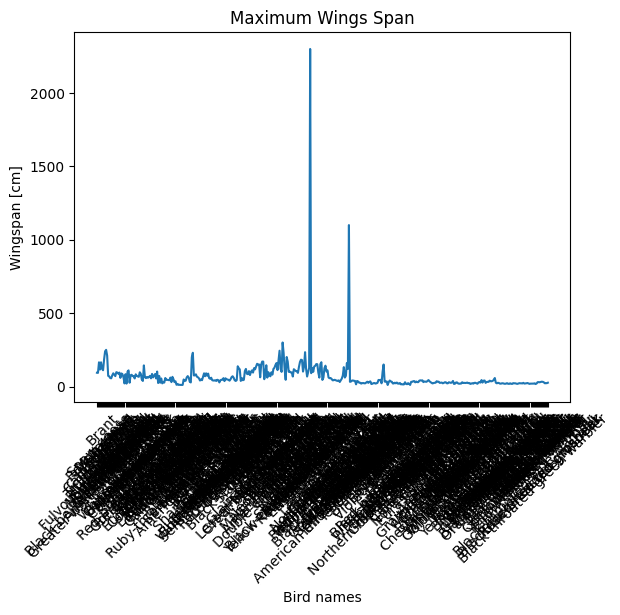

In [37]:
# Visualize the maxwingspan
plt.plot(birds["Name"], birds["MaxWingspan"])
plt.title("Maximum Wings Span")
plt.xticks(rotation=45)
plt.xlabel("Bird names")
plt.ylabel("Wingspan [cm]")
plt.show();

It it clear there are outliers in the MaxWingspan column but because the names are to superimposing on each other, we can read.

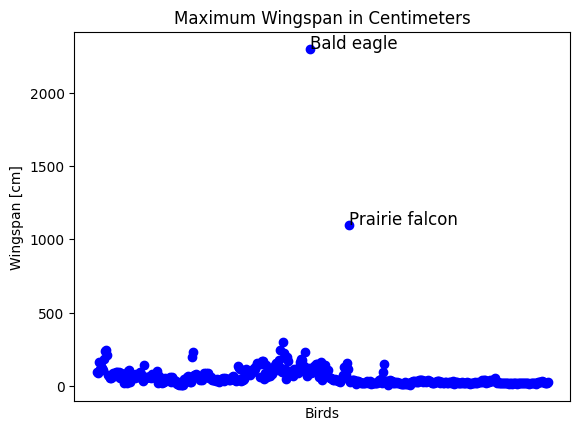

In [38]:
plt.title("Maximum Wingspan in Centimeters")
plt.ylabel("Wingspan [cm]")
plt.xlabel("Birds")
plt.tick_params(bottom=False, labelbottom=False)

for i in range (len(birds)) :
    x = birds["Name"][i]
    y = birds["MaxWingspan"][i]
    plt.plot(x, y, 'bo')
    if birds["MaxWingspan"][i] > 500:
        plt.text(x, y, birds["Name"][i], fontsize=12)

plt.show()

We can see indeed that there are two birds with extreme wingspan - Bald eagle and Prairie falcon

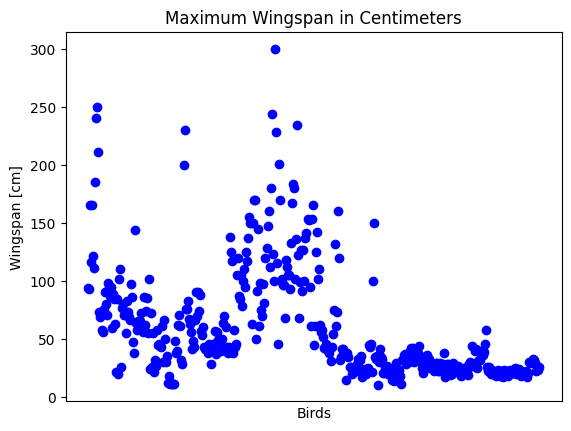

In [39]:
plt.title("Maximum Wingspan in Centimeters")
plt.ylabel("Wingspan [cm]")
plt.xlabel("Birds")
plt.tick_params(bottom=False, labelbottom=False)

for i in range(len(birds)):
    x = birds["Name"][i]
    y = birds["MaxWingspan"][i]
    if birds["Name"][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'bo')

We can clearly see the relationship between birds and wingspan.

### Explore bar charts

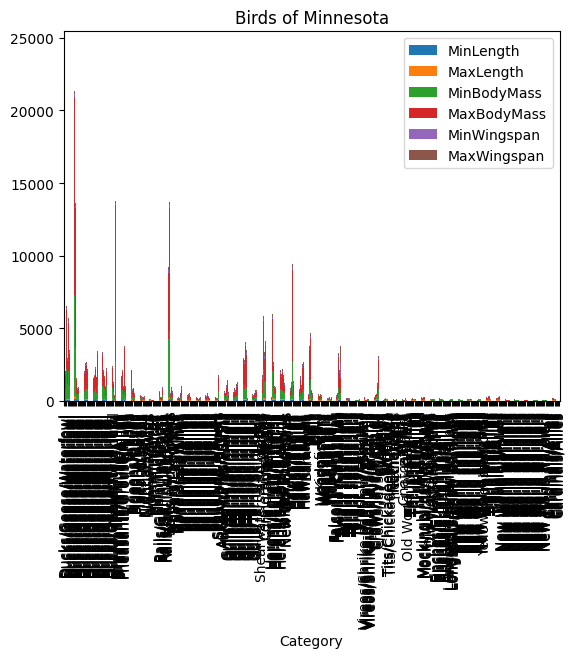

In [41]:
birds.plot(x='Category',
           kind='bar',stacked=True,
           title='Birds of Minnesota');

<Axes: >

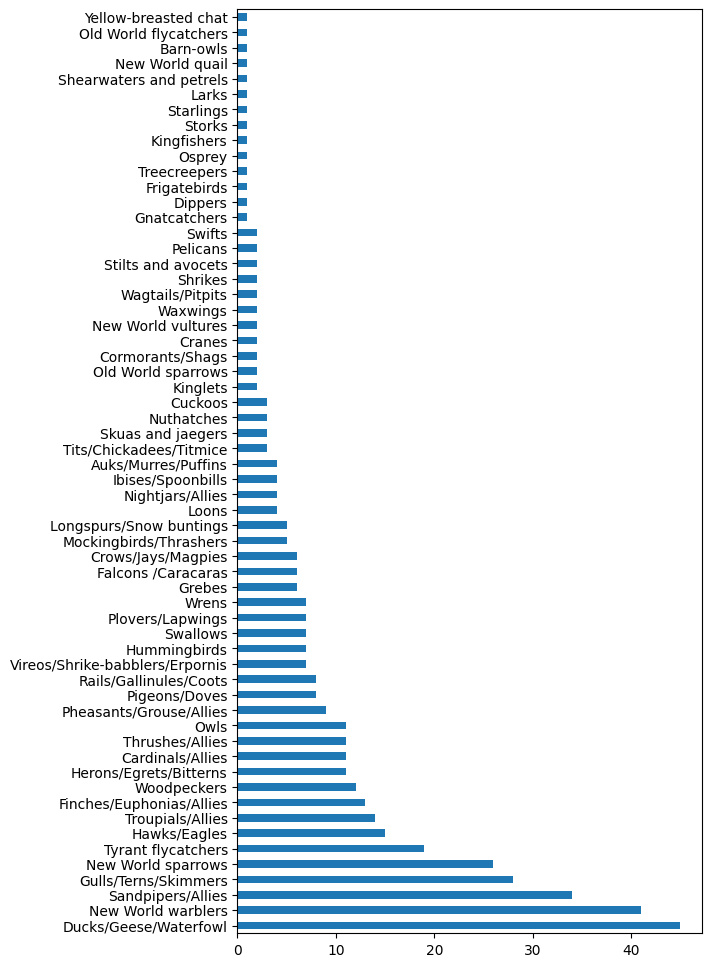

In [42]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()

<Axes: >

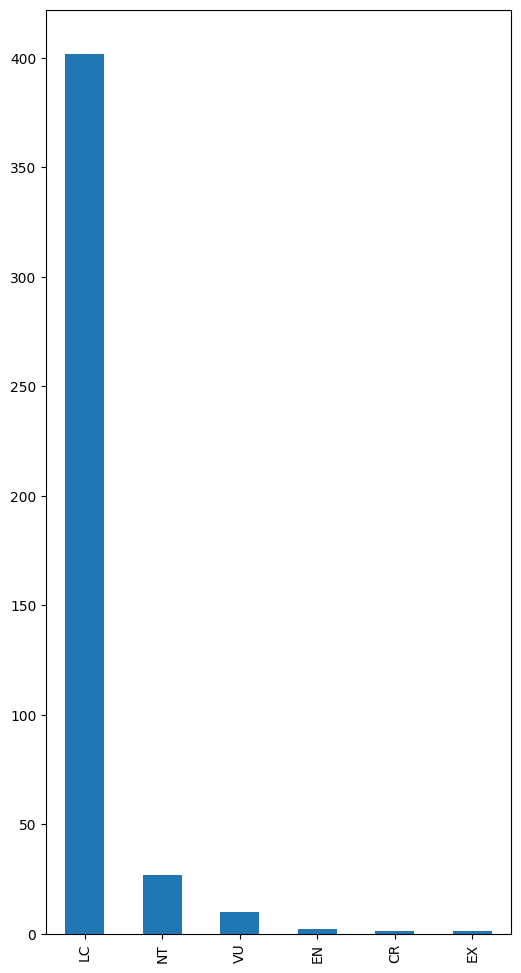

In [43]:
conversation_status_count = birds.value_counts(birds['ConservationStatus'].values,sort=True)
plt.rcParams['figure.figsize'] = [6,12]
conversation_status_count.plot.bar()

In [44]:
birds.value_counts(birds['ConservationStatus'])

ConservationStatus
LC    402
NT     27
VU     10
EN      2
CR      1
EX      1
Name: count, dtype: int64

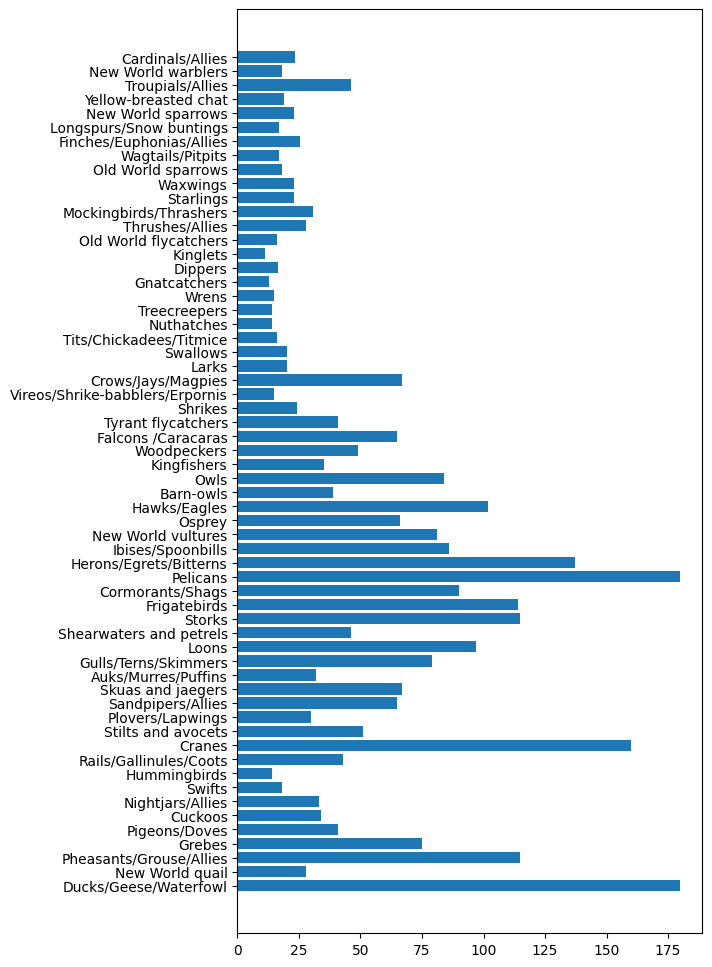

In [45]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

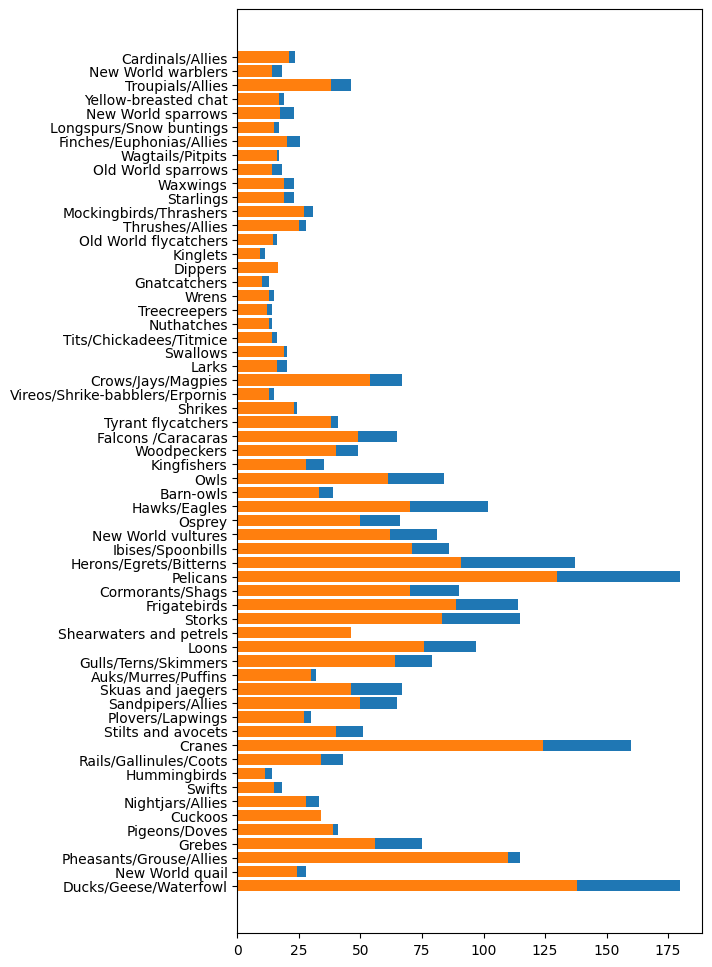

In [46]:
minLength = birds['MinLength']
maxLength = birds['MaxLength']
category = birds['Category']

plt.barh(category, maxLength)
plt.barh(category, minLength)

plt.show()